<a href="https://colab.research.google.com/github/PratikshaShelke24/data-science/blob/main/unsuperviesd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K-Means clustering implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features (sepal & petal length & width)
y = iris.target  # Labels (Setosa, Versicolor, Virginica)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (KNN is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Choose K=5 (you can try different values)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [ ]:
# another example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
# Sample data
X = np.array([[2, 4], [4, 2], [4, 4], [6, 6], [6, 2], [8, 4],[7,7]])  # Features
y = np.array([0, 0, 0, 1, 1, 1,1])  # Labels (0 = Class A, 1 = Class B)


In [ ]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# New point to classify
new_point = np.array([[6, 7]])
predicted_class = knn.predict(new_point)


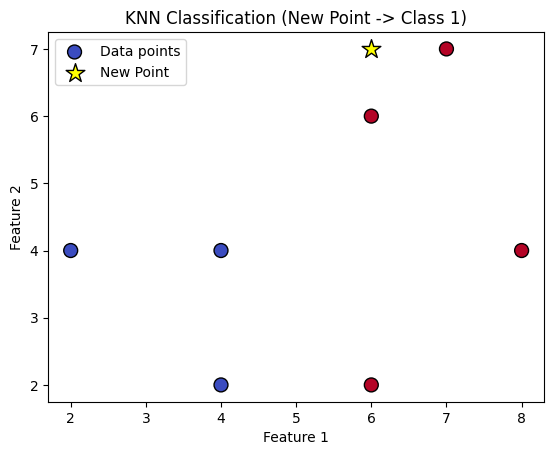

In [ ]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100, label="Data points")
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', marker='*', s=200, label="New Point")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Classification (New Point -> Class {predicted_class[0]})")
plt.show()


In [1]:
#k-means clustering implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Sample data (X, Y coordinates)
data = np.array([[1, 2], [2, 3], [3, 3], [8, 7], [8, 8], [25, 80]])

In [4]:
# Apply K-Means clustering (K=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

In [5]:
# Get cluster labels
labels = kmeans.labels_

In [6]:
# Get centroids
centroids = kmeans.cluster_centers_

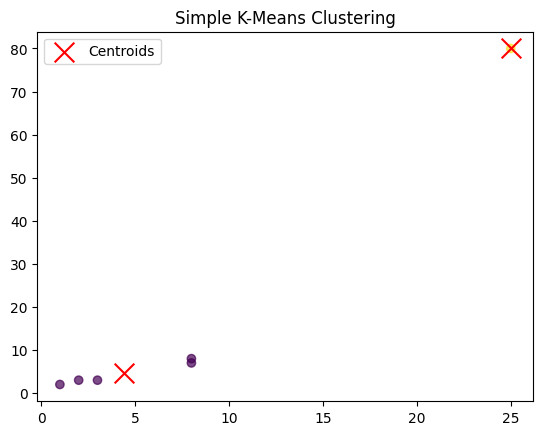

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("Simple K-Means Clustering")
plt.legend()
plt.show()
